In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import random

%matplotlib widget

In [2]:
# Parameters for universe initialization
box_const_size = 500
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 20
num_steps = 20
radius  = 100

#other setup
seed = 1313

# Create Universe
molecules = [mc.Molecule(np.array([random.uniform(0,box_size[0]), 
                    random.uniform(0,box_size[1]), 
                    random.uniform(0,box_size[2]) ]),radius) for _ in range(num_molecules)]

print(len(molecules),molecules[0].pos)

uni = mc.SimpleUniverse(molecules,seed)


20 [ 12.35944406  90.24026452 223.9782839 ]


In [3]:
points = []

# Perform Simulation
for i in range(num_steps):
  #randomly select a molecule
  mol = uni.select_molecule()
  #keep proposing new steps until one is accepted
  mc.step(uni,mol)
  #store intermediate results?
  points.append(uni.get_state())



C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim\forces.py:47: RuntimeWarning: invalid value encountered in log
  thrd_term = np.log((r2 - square_p)/(r2 - square_n))
C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim\forces.py:80: RuntimeWarning: invalid value encountered in double_scalars
  snd = 28 * (y**(-1/4) - 1)
C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim\forces.py:81: RuntimeWarning: invalid value encountered in double_scalars
  trd = (20/11) * (1 - y**(11/4))


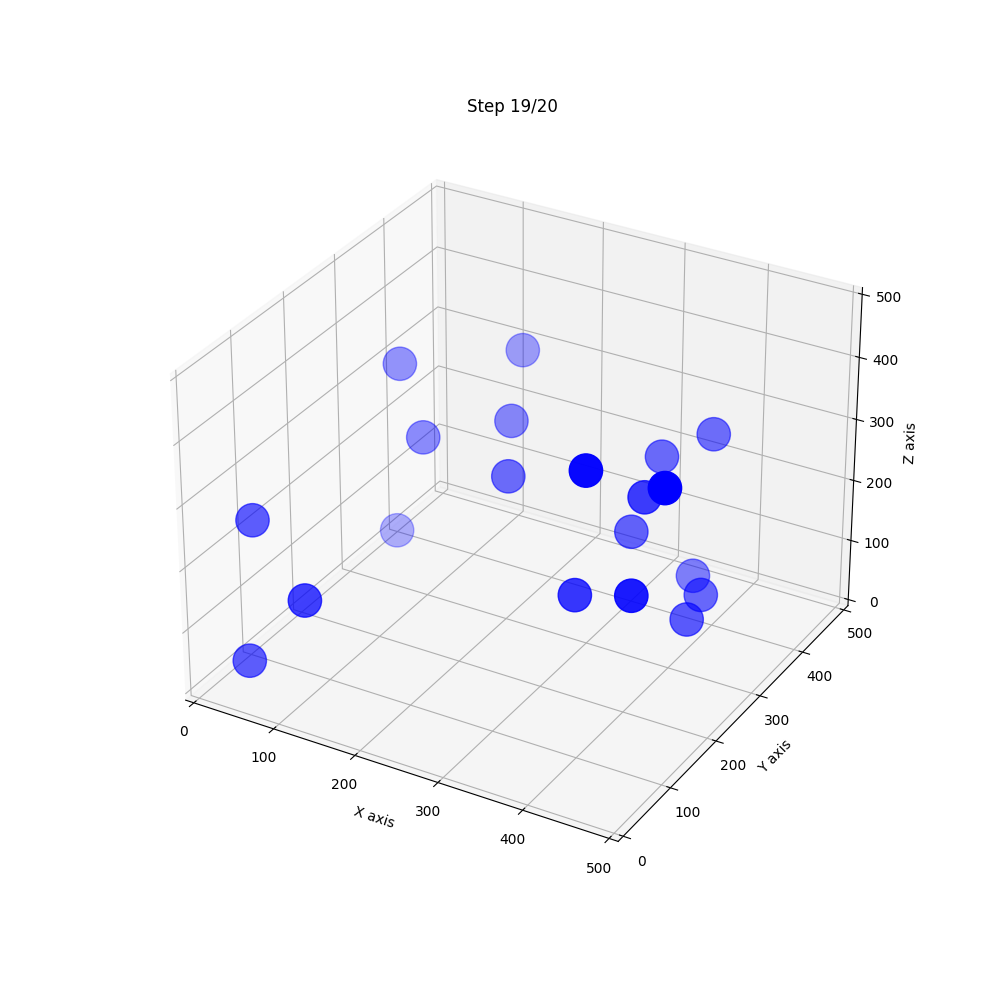

In [4]:
#Plot each iteration of the simulation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Generate sample data (list of 3D coordinates at different steps)
data = points  # Random 3D coordinates

fig_size = 10
points_whole_ax = fig_size * 1 * 72    # 1 point = dpi / 72 pixels
points_radius = 2 * radius / box_size[0] * points_whole_ax

# Set up the figure and 3D axis
fig = plt.figure(figsize=(fig_size,fig_size))

ax = fig.add_subplot(111, projection='3d')

# Function to update the plot based on the selected step
def update_plot(frame):
    ax.clear()
    ax.set_title(f"Step {frame}/{num_steps}")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim(0, box_size[0])  # Adjust as per your data range
    ax.set_ylim(0, box_size[0])  # Adjust as per your data range
    ax.set_zlim(0, box_size[0])  # Adjust as per your data range


    # Plot the 3D coordinates for the selected step
    
    x = data[frame][:, 0]
    y = data[frame][:, 1]
    z = data[frame][:, 2]



    ax.scatter(x, y, z, c='blue', marker='o',s=points_radius*2)
    #plt.show()

# Create the animation
ani = FuncAnimation(fig, update_plot, frames=num_steps, interval=20)
# Display the animation in the notebook
#HTML(ani.to_jshtml())
#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)

HTML(ani.to_html5_video())

#for i in range(num_steps):
#  update_plot(i)
    

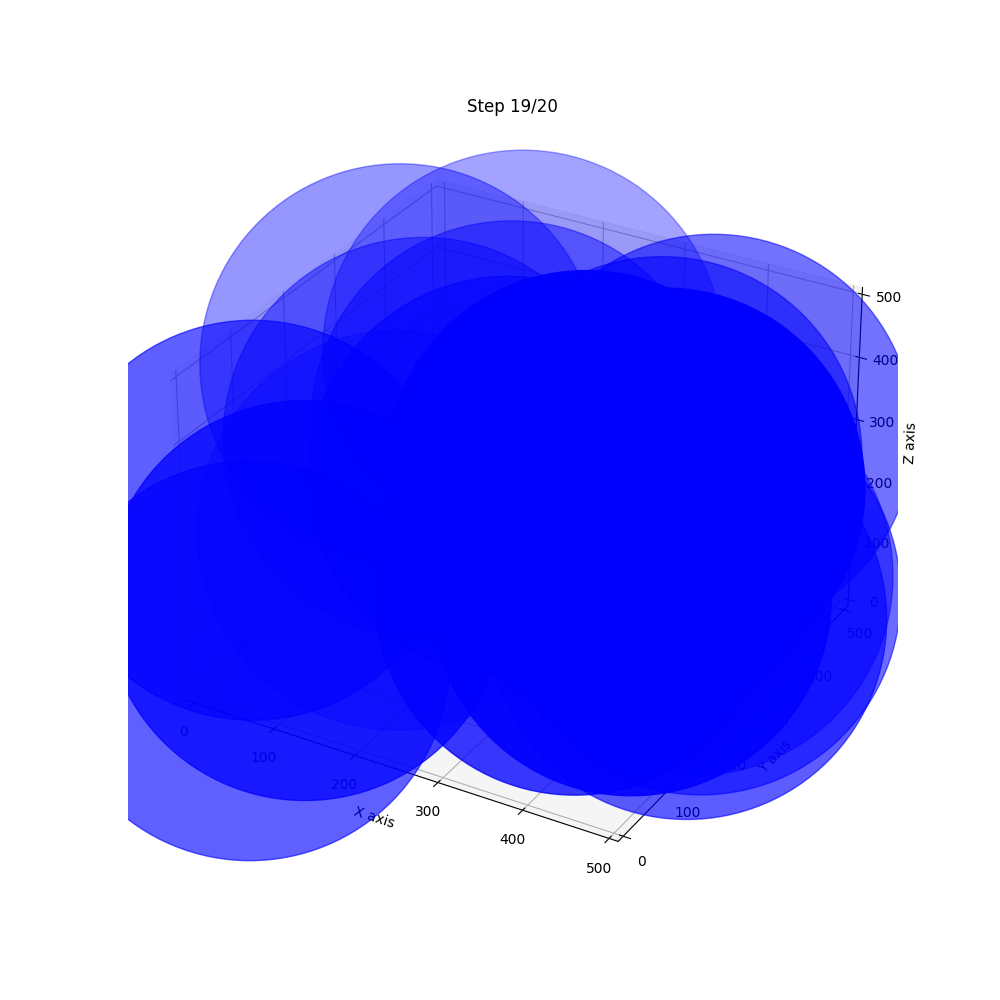

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Generate sample data (list of 3D coordinates at different steps)
data = points  # Random 3D coordinates

fig_size = 10
points_whole_ax = fig_size * 1 * 72    # 1 point = dpi / 72 pixels
points_radius = 2 * radius / box_size[0] * points_whole_ax

# Set up the figure and 3D axis
fig = plt.figure(figsize=(fig_size,fig_size))


ax = fig.add_subplot(111, projection='3d')#,position=[0.0, 0.0, 1, 1])

# Function to update the plot based on the selected step
def update_plot(frame):
    ax.clear()
    ax.set_title(f"Step {frame}/{num_steps}")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_xlim(0, box_size[0])  # Adjust as per your data range
    ax.set_ylim(0, box_size[1])  # Adjust as per your data range
    ax.set_zlim(0, box_size[2])  # Adjust as per your data range

    #ax.set_box_aspect(1)


    # Plot the 3D coordinates for the selected step
    
    x = data[frame][:, 0]
    y = data[frame][:, 1]
    z = data[frame][:, 2]



    ax.scatter(x, y, z, c='blue', marker='o',s=points_radius**2)
    #plt.show()

# Create the animation
ani = FuncAnimation(fig, update_plot, frames=num_steps, interval=20)
# Display the animation in the notebook
#HTML(ani.to_jshtml())
#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)

HTML(ani.to_html5_video())

In [6]:
plt.figure(figsize=(fig_size,fig_size),projection="3d")

TypeError: __init__() got an unexpected keyword argument 'projection'